<img src="https://camo.githubusercontent.com/cc5541fa8bc6f822cb8d5b4261a23f20ec8321f4/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393438362d34373138653338362d343665632d313165382d396663332d3532353061343965663537302e706e67">

---

# 6- Fruit recognition

Import necessary libraries:

In [203]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

Modify a little bit out camera code, to save frames marked as `TYPE_1` if `1` is pressed, and frames marked as `TYPE_2` if `2` is pressed.

_⚠️It's recommendable take at least 10 pictures of each type!_

In [239]:
class_names = ['RED APPLE', 'GREEN APPLE', 'PEAR', 'BANANA']

In [208]:
# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500
raw_frames_type_1 = []
raw_frames_type_2 = []
raw_frames_type_3 = []
raw_frames_type_4 = []

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (0, 255, 0), 2)

    # show the frame
    cv2.imshow("Capturing frames", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        # save the frame
        raw_frames_type_1.append(frame)
        print('1 key pressed - saved TYPE_1 frame')
    elif key & 0xFF == ord("2"):
        # save the frame
        raw_frames_type_2.append(frame)
        print('2 key pressed - Saved TYPE_2 frame')
    elif key & 0xFF == ord("3"):
        # save the frame
        raw_frames_type_3.append(frame)
        print('3 key pressed - Saved TYPE_3 frame')
    elif key & 0xFF == ord("4"):
        # save the frame
        raw_frames_type_4.append(frame)
        print('4 key pressed - Saved TYPE_4 frame')

camera.release()
cv2.destroyAllWindows()

1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
2 key pressed - Saved TYPE_2 frame
2 key pressed - Saved TYPE_2 frame
2 key pressed - Saved TYPE_2 frame
2 key pressed - Save

# Now crop ROI from the frames, resize it to `224*224` and persist them to
- `data/images_type_1`
- `data/images_type_2`
- `data/images_type_3`
- `data/images_type_4`

In [209]:
save_width = 399
save_height = 399

In [210]:
for i, frame in enumerate(raw_frames_type_1):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_1/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_2):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_2/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_3):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_3/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_4):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_4/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

Take a look at the folders to see if images were saved correctly.

Now let's load again the images:

In [211]:
width = 96
height = 96

In [218]:
from glob import glob
from keras import preprocessing

# load images type_1
images_type_1 = []
for image_path in glob('./data/images_type_1/*.*'):
    image = preprocessing.image.load_img(image_path,
                                         target_size=(width, height))
    x = preprocessing.image.img_to_array(image)

    images_type_1.append(x)

# load images type_2
images_type_2 = []
for image_path in glob('./data/images_type_2/*.*'):
    image = preprocessing.image.load_img(image_path,
                                         target_size=(width, height))
    x = preprocessing.image.img_to_array(image)

    images_type_2.append(x)

# load images type_3
images_type_3 = []
for image_path in glob('./data/images_type_3/*.*'):
    image = preprocessing.image.load_img(image_path,
                                         target_size=(width, height))
    x = preprocessing.image.img_to_array(image)

    images_type_3.append(x)
    
# load images type_4
images_type_4 = []
for image_path in glob('./data/images_type_4/*.*'):
    image = preprocessing.image.load_img(image_path,
                                         target_size=(width, height))
    x = preprocessing.image.img_to_array(image)

    images_type_4.append(x)

Show first 5 type_1 images:

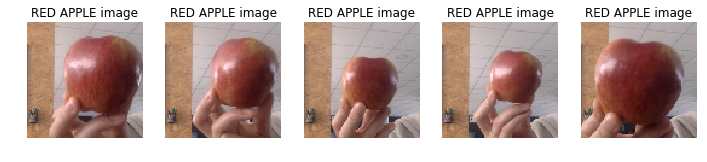

In [240]:
plt.figure(figsize=(12,8))

for i, x in enumerate(images_type_1[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))

# show the plot
plt.show()

Show first 5 type_2 images:

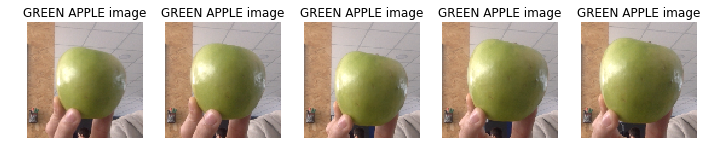

In [241]:
plt.figure(figsize=(12,8))

for i, x in enumerate(images_type_2[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))

# show the plot
plt.show()

Show first 5 type_3 images:

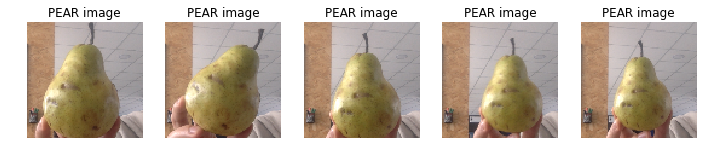

In [242]:
plt.figure(figsize=(12,8))

for i, x in enumerate(images_type_3[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[2]))

# show the plot
plt.show()

Show first 5 type_4 images:

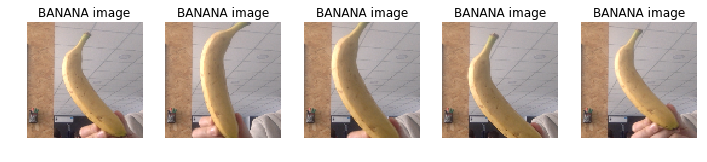

In [243]:
plt.figure(figsize=(12,8))

for i, x in enumerate(images_type_4[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[3]))

# show the plot
plt.show()

### Prepare images as tensors

In [223]:
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)
X_type_3 = np.array(images_type_3)
X_type_4 = np.array(images_type_4)

print(X_type_1.shape)
print(X_type_2.shape)
print(X_type_3.shape)
print(X_type_4.shape)

(25, 96, 96, 3)
(17, 96, 96, 3)
(15, 96, 96, 3)
(20, 96, 96, 3)


In [225]:
X = np.concatenate((X_type_1, X_type_2), axis=0)

if len(X_type_3):
    X = np.concatenate((X, X_type_3), axis=0)

if len(X_type_4):
    X = np.concatenate((X, X_type_4), axis=0)

# scale the data to [0, 1] values
X = X / 255.

X.shape

(77, 96, 96, 3)

We need to create a `y_train`, so we'll use `0` to indicate `TYPE_1`, and `1` to indicate `TYPE_2`.

In [228]:
from keras.utils import to_categorical

y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]
y_type_3 = [2 for item in enumerate(X_type_3)]
y_type_4 = [3 for item in enumerate(X_type_4)]

y = np.concatenate((y_type_1, y_type_2), axis=0)

if len(y_type_3):
    y = np.concatenate((y, y_type_3), axis=0)

if len(X_type_4):
    y = np.concatenate((y, y_type_4), axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)
print(y)

(77, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [

## Convolutional network configuration

Let's create a deep network which will learn our emotions and then will try to predict them.

In [232]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

# default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
                dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
                dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
                lr=lr):
    model = Sequential()

    model.add(Convolution2D(conv_1, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))

    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
        
    model.add(Flatten())
        
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))

    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))

    model.add(Dense(len(class_names), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [233]:
import numpy as np
np.random.seed(1) # for reproducibility

# model with base parameters
model = build_model()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 15488)             0         
__________

In [234]:
%%time

model.fit(X, y, epochs=epochs)

Epoch 1/30
77/77 [==============================] - 3s 43ms/step - loss: 5.9179 - acc: 0.1429
Epoch 2/30
77/77 [==============================] - 2s 20ms/step - loss: 3.5595 - acc: 0.2987
Epoch 3/30
77/77 [==============================] - 2s 21ms/step - loss: 1.7439 - acc: 0.3117
Epoch 4/30
77/77 [==============================] - 1s 19ms/step - loss: 1.4133 - acc: 0.3117
Epoch 5/30
77/77 [==============================] - 1s 19ms/step - loss: 1.2960 - acc: 0.3636
Epoch 6/30
77/77 [==============================] - 1s 19ms/step - loss: 1.2263 - acc: 0.5584
Epoch 7/30
77/77 [==============================] - 1s 18ms/step - loss: 1.1666 - acc: 0.5714
Epoch 8/30
77/77 [==============================] - 1s 18ms/step - loss: 1.0826 - acc: 0.5584
Epoch 9/30
77/77 [==============================] - 1s 17ms/step - loss: 0.8889 - acc: 0.5714
Epoch 10/30
77/77 [==============================] - 1s 17ms/step - loss: 0.7638 - acc: 0.7143
Epoch 11/30
77/77 [==============================] - 1s 17m

We have just created and trained our first deep network model 🎉

Let's try it!

### Predict using our model

First we are going to test individual images:

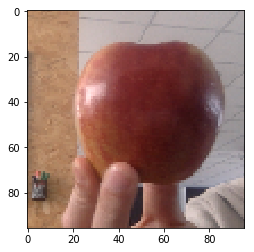

'RED APPLE'

In [244]:
type_1 = preprocessing.image.load_img('./data/images_type_1/0.png',
                                      target_size=(width, height))
plt.imshow(type_1)
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)

predictions = model.predict(type_1_X)

class_names[np.argmax(predictions)]

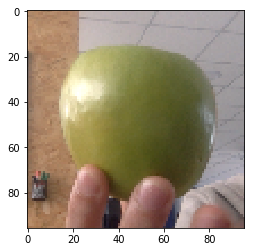

'GREEN APPLE'

In [245]:
type_2 = preprocessing.image.load_img('./data/images_type_2/1.png',
                                      target_size=(width, height))
plt.imshow(type_2)
plt.show()

type_2_X = np.expand_dims(type_2, axis=0)

predictions = model.predict(type_2_X)

class_names[np.argmax(predictions)]

Finally test our model predictions live with our camera:

In [246]:
import time 

# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frameq
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (240, 100, 0), 2)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize
    roi = cv2.resize(roi, (width, height))
    
    # predict!
    roi_X = np.expand_dims(roi, axis=0)

    predictions = model.predict(roi_X)
    type_1_pred, type_2_pred, type_3_pred, type_4_pred = predictions[0]

    # add text
    type_1_text = '{}: {}%'.format(class_names[0], int(type_1_pred*100))
    cv2.putText(frame, type_1_text, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_2_text = '{}: {}%'.format(class_names[1], int(type_2_pred*100))
    cv2.putText(frame, tipe_2_text, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    
    # add text
    tipe_3_text = '{}: {}%'.format(class_names[2], int(type_3_pred*100))
    cv2.putText(frame, tipe_3_text, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_4_text = '{}: {}%'.format(class_names[3], int(type_4_pred*100))
    cv2.putText(frame, tipe_4_text, (70, 260), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # show the frame
    cv2.imshow("Test out", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

<img src="https://camo.githubusercontent.com/53f6fb6ccefefd87dc93af20b8e7972573de9828/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393531382d35396661353163652d343665632d313165382d383530332d3566383133363535386632622e706e67">
<a href="https://rmotr.com" target="_blank">rmotr.com</a>